In [1]:
import pandas as pd
!pip install pandas_datareader
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
livre_de_risco = 0.02 # taxa de juros
criptos = ['ETH-USD', 'XRP-USD', 'LTC-USD', 'XMR-USD', 'DASH-USD']

In [3]:
data_inicio = '12-01-2019'
data_final = '12-01-2020' # padrão americano

In [4]:
dados = web.DataReader(criptos, data_source='yahoo', start=data_inicio, end=data_final)['Adj Close']

In [5]:
dados.head(5)

Symbols,ETH-USD,XRP-USD,LTC-USD,XMR-USD,DASH-USD
Date,,,,,
2019-12-01,151.185730,0.225333,47.711170,53.586262,53.277573
2019-12-02,149.059158,0.219581,45.817017,54.031662,51.803318
2019-12-03,147.956421,0.219870,45.381603,53.426609,51.577984
2019-12-04,146.747742,0.216348,45.192951,53.051445,50.806087
2019-12-05,149.248993,0.222928,45.301640,54.006493,50.487137


In [6]:
dados.sort_index(inplace=True)

In [7]:
dados.head()

Symbols,ETH-USD,XRP-USD,LTC-USD,XMR-USD,DASH-USD
Date,,,,,
2019-12-01,151.185730,0.225333,47.711170,53.586262,53.277573
2019-12-02,149.059158,0.219581,45.817017,54.031662,51.803318
2019-12-03,147.956421,0.219870,45.381603,53.426609,51.577984
2019-12-04,146.747742,0.216348,45.192951,53.051445,50.806087
2019-12-05,149.248993,0.222928,45.301640,54.006493,50.487137


In [8]:
retornos = dados.pct_change()

In [9]:
retornos

Symbols,ETH-USD,XRP-USD,LTC-USD,XMR-USD,DASH-USD
Date,,,,,
2019-12-01,NaN,NaN,NaN,NaN,NaN
2019-12-02,-0.014066,-0.025527,-0.039700,0.008312,-0.027671
2019-12-03,-0.007398,0.001316,-0.009503,-0.011198,-0.004350
2019-12-04,-0.008169,-0.016019,-0.004157,-0.007022,-0.014966
2019-12-05,0.017045,0.030414,0.002405,0.018002,-0.006278
...,...,...,...,...,...
2020-11-28,0.040070,0.118644,0.051633,0.039985,0.187696
2020-11-29,0.069725,-0.030971,0.089996,0.016299,-0.011168
2020-11-30,0.067884,0.095821,0.105251,0.046146,0.042853


In [10]:
retornos_medios = retornos.mean()

In [11]:
retornos_medios

Symbols
ETH-USD     0.005086
XRP-USD     0.004068
LTC-USD     0.002943
XMR-USD     0.003519
DASH-USD    0.003688
dtype: float64

In [12]:
cov_matrix = retornos.cov()

In [13]:
cov_matrix

Symbols,ETH-USD,XRP-USD,LTC-USD,XMR-USD,DASH-USD
Symbols,,,,,
ETH-USD,0.002404,0.001880,0.002065,0.001807,0.001903
XRP-USD,0.001880,0.002555,0.001807,0.001540,0.001816
LTC-USD,0.002065,0.001807,0.002361,0.001736,0.001948
XMR-USD,0.001807,0.001540,0.001736,0.002093,0.001838
DASH-USD,0.001903,0.001816,0.001948,0.001838,0.003746


In [14]:
np.random.seed(42)
num_portfolios = 10000 # portfolios simulados
resultados = np.zeros((len(criptos)+3, num_portfolios))

In [15]:
resultados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
for i in range(num_portfolios):
    pesos = np.random.random(5)
    pesos /= np.sum(pesos)
    
    retorno_portfolio = np.sum(retornos_medios * pesos)*365
    desvio_padrao_portfolio = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))*np.sqrt(365)
    resultados[0,i] = retorno_portfolio
    resultados[1,i] = desvio_padrao_portfolio
    resultados[2,i] = (resultados[0,i] / resultados[1,i]) - livre_de_risco # indice de sharpe
    for j in range(len(pesos)):
        resultados[j+3,i] = pesos[j]

In [17]:
resultados_frame = pd.DataFrame(resultados.T,columns = ['retorno', 'desvio_padrao', 'sharpe',criptos[0],criptos[1],
                                                        criptos[2],criptos[3],criptos[4]])
retorno = resultados_frame.iloc[resultados_frame['retorno'].idxmax()]
max_sharpe_port = resultados_frame.iloc[resultados_frame['sharpe'].idxmax()]
min_vol_port = resultados_frame.iloc[resultados_frame['desvio_padrao'].idxmin()]

In [18]:
precos = pd.DataFrame()
for t in criptos:
    precos[t]=web.DataReader(t, data_source='yahoo', start=data_inicio, end=data_final)['Adj Close']

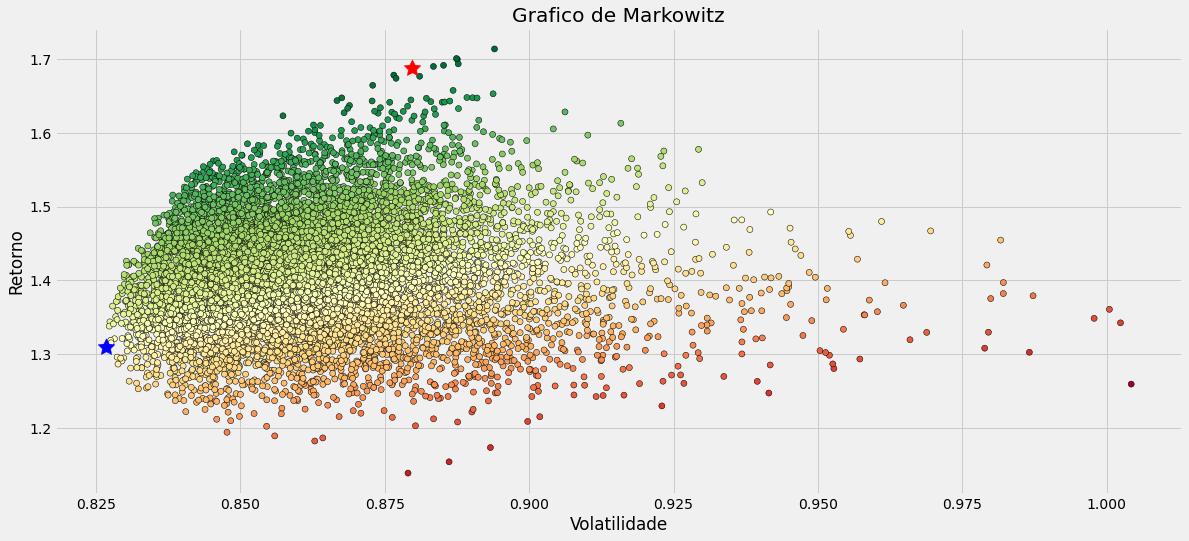

In [19]:
plt.rcParams['figure.figsize'] = (18,8)
plt.style.use('fivethirtyeight')
plt.scatter(resultados_frame.desvio_padrao, resultados_frame.retorno, 
            c = resultados_frame.sharpe, cmap='RdYlGn',
            marker='o', facecolors='none', edgecolors='black')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.title('Grafico de Markowitz')
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),label='Sharpe',color='r',s=300)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),label='Vol Min',color='b',s=300)

# Portfolio de máximo coef de sharpe = estrela vermelha
# portfolio de menor volatilidade = estrela azul

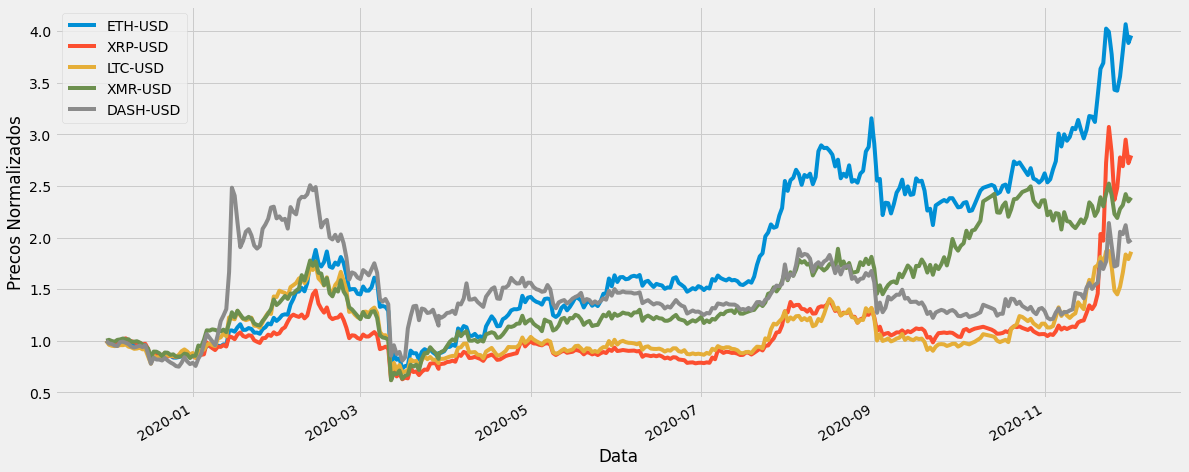

In [20]:
precos_normalizados = precos/precos.iloc[0]
precos_normalizados.plot(figsize=(18,8))
plt.ylabel('Precos Normalizados')
plt.xlabel('Data')
plt.show()

In [21]:
precos

,ETH-USD,XRP-USD,LTC-USD,XMR-USD,DASH-USD
Date,,,,,
2019-12-01,151.185730,0.225333,47.711170,53.586262,53.277573
2019-12-02,149.059158,0.219581,45.817017,54.031662,51.803318
2019-12-03,147.956421,0.219870,45.381603,53.426609,51.577984
2019-12-04,146.747742,0.216348,45.192951,53.051445,50.806087
2019-12-05,149.248993,0.222928,45.301640,54.006493,50.487137
...,...,...,...,...,...
2020-11-28,538.229797,0.625622,72.692963,122.003983,109.498940
2020-11-29,575.758057,0.606246,79.235069,123.992523,108.276108
2020-11-30,614.842529,0.664337,87.574631,129.714264,112.916100


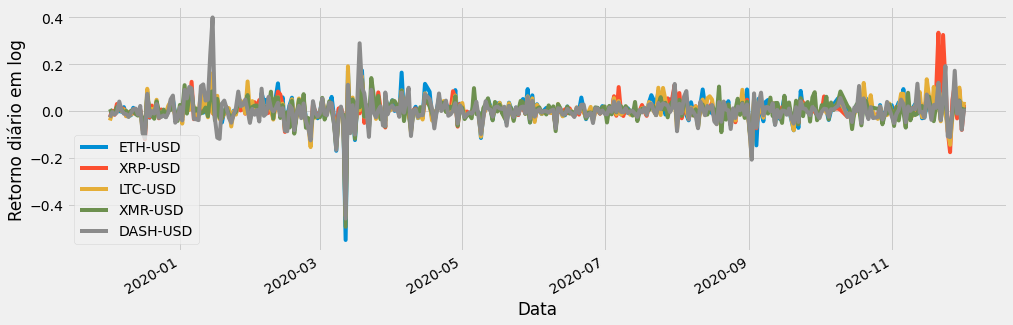

In [22]:
log_retornos = np.log(precos/precos.shift(1))
log_retornos.plot(figsize=(15,5))
plt.xlabel('Data')
plt.ylabel('Retorno diário em log')
plt.show()

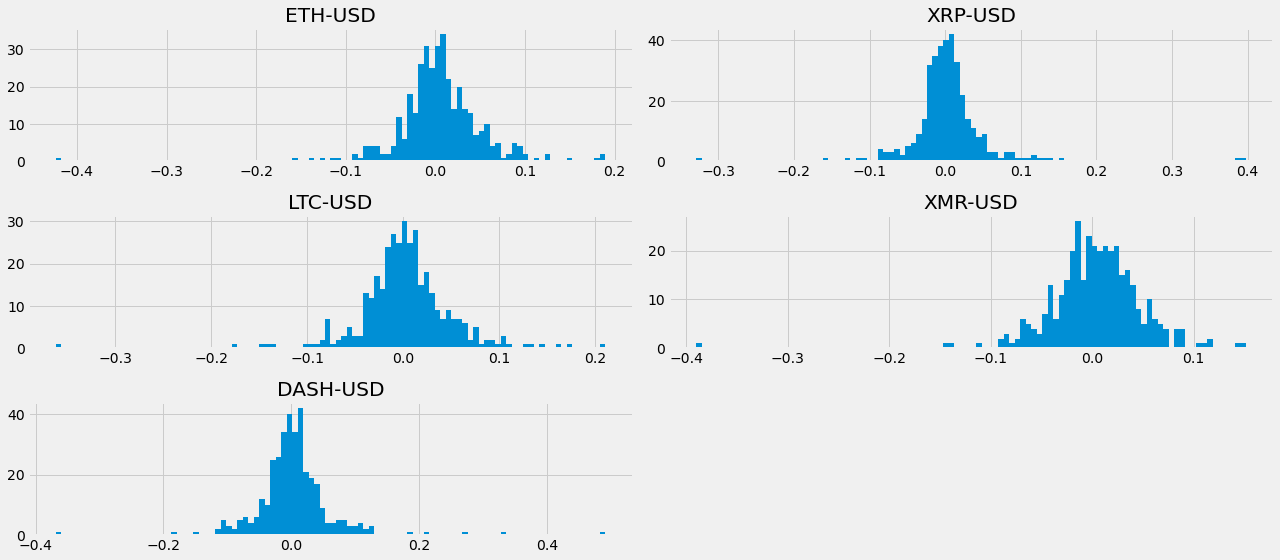

In [23]:
retornos.hist(bins=100,figsize=(18,8));
sns.histplot(retornos, kde=False)
plt.tight_layout()

In [24]:
max_sharpe_port

retorno          1.687276
desvio_padrao    0.879746
sharpe           1.897911
ETH-USD          0.606094
XRP-USD          0.281543
LTC-USD          0.016060
XMR-USD          0.046383
DASH-USD         0.049922
Name: 9976, dtype: float64

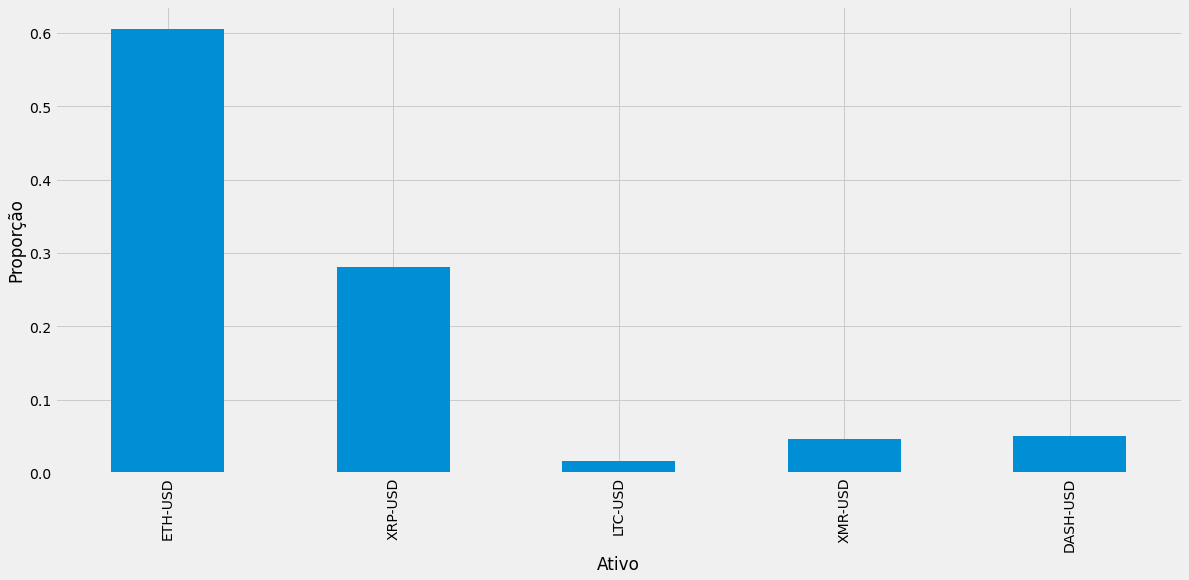

In [25]:
max_sharpe_port[criptos].plot(kind='bar')
plt.xlabel('Ativo')
plt.ylabel('Proporção')
plt.show()

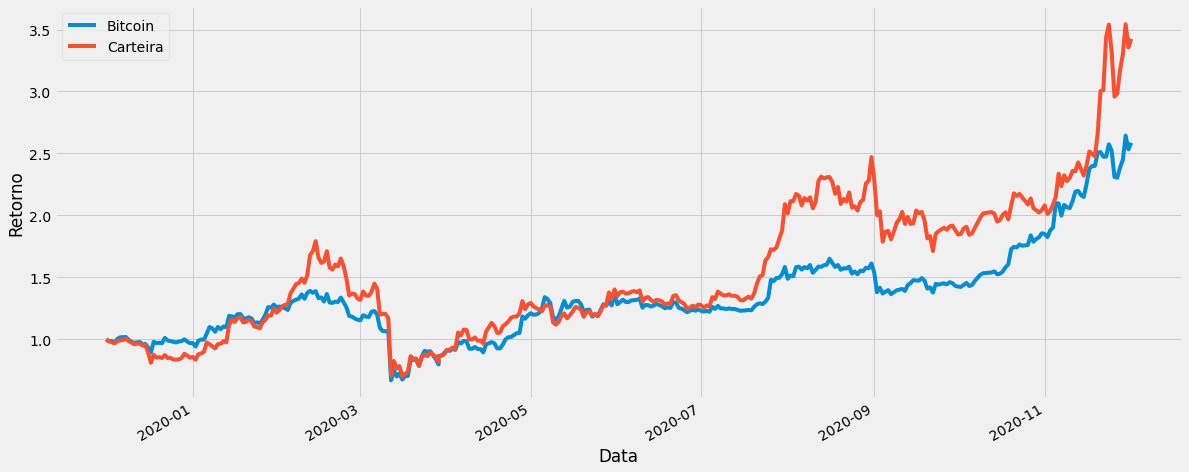

In [26]:
# Comparacao da carteira com Bitcoin

dados_bitcoin = pd.DataFrame()
dados_bitcoin = web.DataReader('BTC-USD', data_source='yahoo', start=data_inicio, end=data_final)['Adj Close']

bitcoin = (dados_bitcoin/dados_bitcoin.iloc[0])

retorno_carteira = 0

for i in range(len(criptos)):
    retorno_carteira += max_sharpe_port[criptos[i]]*precos_normalizados[criptos[i]]

bitcoin.plot(label='Bitcoin', legend='better')
retorno_carteira.plot(label='Carteira',legend='better')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.show()

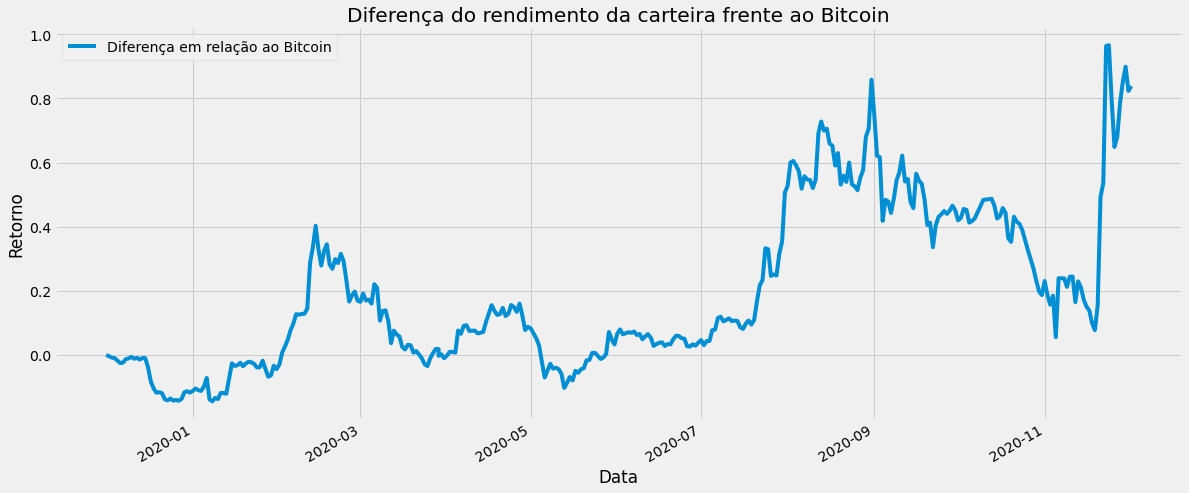

In [27]:
diferença = (retorno_carteira-bitcoin)
diferença.plot(label='Diferença em relação ao Bitcoin', legend='better')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.title("Diferença do rendimento da carteira frente ao Bitcoin")
plt.show()

C:\Users\99821353\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


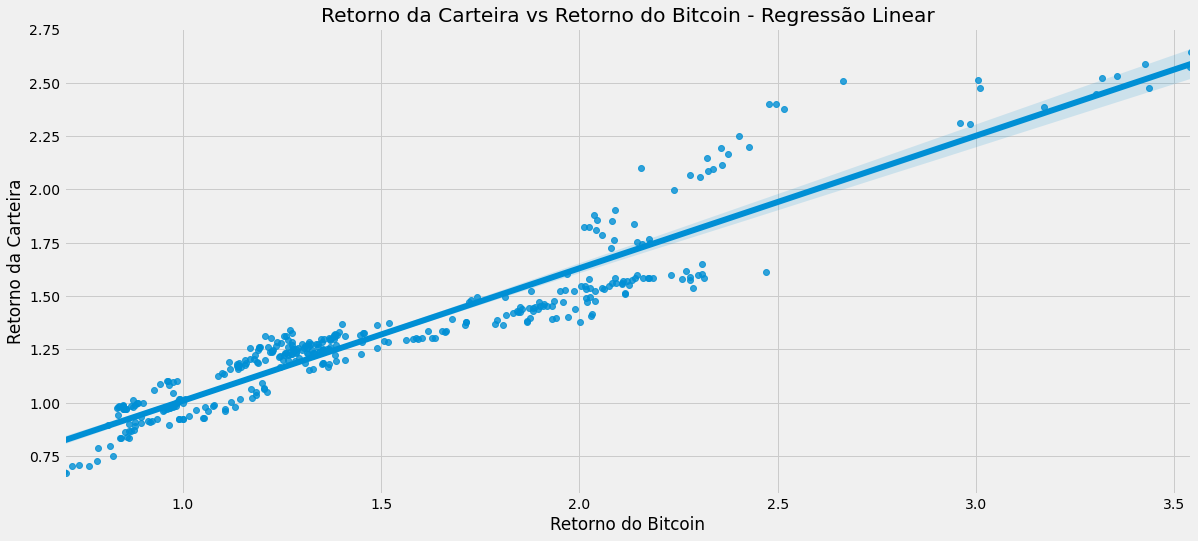

In [28]:
LR = stats.linregress(retorno_carteira.values, bitcoin.values)
sns.regplot(retorno_carteira.values, bitcoin.values)
plt.xlabel("Retorno do Bitcoin")
plt.ylabel("Retorno da Carteira")
plt.title("Retorno da Carteira vs Retorno do Bitcoin - Regressão Linear")
plt.show()

In [29]:
(beta, alfa) = LR[0:2]
print("O Beta da carteira é", beta) #Equivale ao coeficiente angular da regressão
print("O Alfa da carteira é", alfa) #Equivale ao coeficiente linear da regressão

O Beta da carteira é 0.6215400685838408
O Alfa da carteira é 0.3870521997752425
